In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("data/data.csv") \
       .assign(dump_time=lambda df: pd.to_datetime(df["dump_time"])) \
       .set_index("dump_time") \
       .fillna("Butler") \
       .assign(parent_name=lambda df: df.parent_name.astype("category")) \
       .assign(group_name=lambda df: df.group_name.astype("category")) \

In [3]:
from pprint import pprint

buildings = df.groupby(df.parent_name).group_name.unique() \
              .map(set) \
              .to_dict()

pprint(buildings)

{'Avery': set(['Architectural and Fine Arts Library 1',
               'Architectural and Fine Arts Library 2',
               'Architectural and Fine Arts Library 3']),
 'Butler': set(['Butler Library 2',
                'Butler Library 3',
                'Butler Library 301',
                'Butler Library 4',
                'Butler Library 5',
                'Butler Library 6',
                'Butler Library stk']),
 'East Asian Library': set(['Starr East Asian Library']),
 'John Jay': set(["JJ's Place", 'John Jay Dining Hall']),
 'Lehman Library': set(['Lehman Library 2', 'Lehman Library 3']),
 'Lerner': set(['Lerner 1',
                'Lerner 2',
                'Lerner 3',
                'Lerner 4',
                'Lerner 5',
                'Roone Arledge Auditorium']),
 'Northwest Corner Building': set(['Science and Engineering Library']),
 'Uris': set(['Uris/Watson Library'])}


In [4]:
group_names = {"M": "Monthly", "H": "Hourly", "W": "Weekly", "D": "Daily"}

def building_plot(building, group=None, start="20140630", end="20150915"):
    floors = buildings[building]
    floor_data = df.loc[df.group_name.isin(floors), ["group_name", "client_count"]] \
                   .loc[start: end] \
                   .pivot(columns="group_name", values="client_count")
    if group is not None:
        floor_data = floor_data.resample(group, how="sum")
    ax = floor_data.plot.line(figsize=(10, 7))
    ax.set_xlabel("Date")
    ax.set_ylabel("Device Count")
    ax.set_title("{} {} Device Counts".format(group_names.get(group, ""), building))

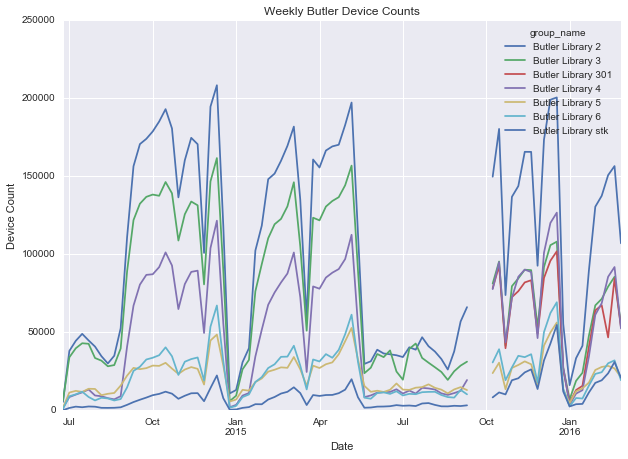

In [5]:
building_plot("Butler", group="W", start=None, end=None)

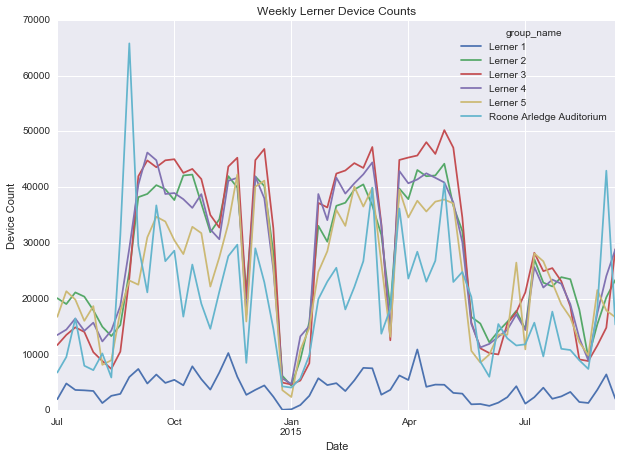

In [6]:
building_plot("Lerner", group="W")

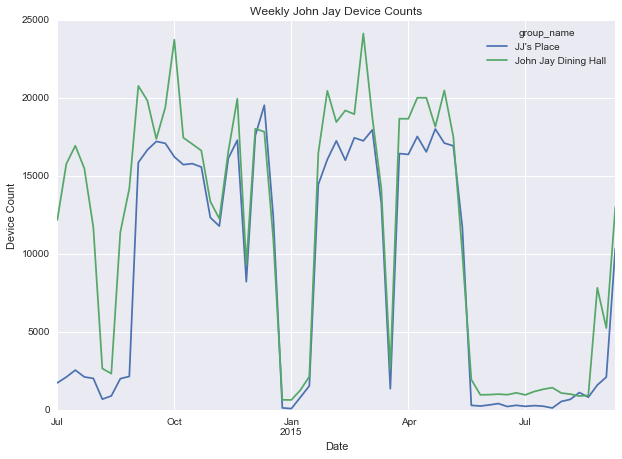

In [7]:
building_plot("John Jay", group="W")

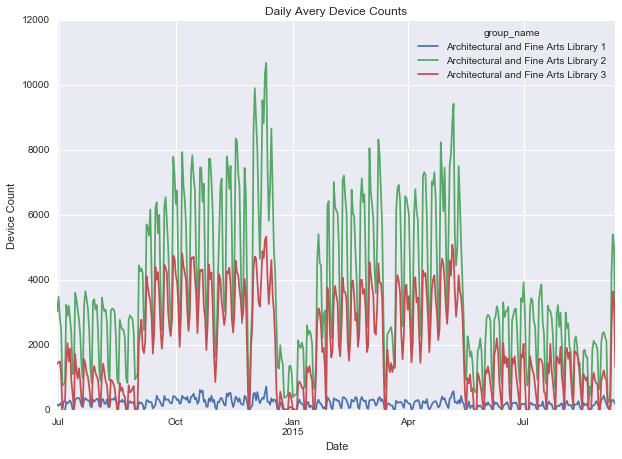

In [8]:
building_plot("Avery", group="D")

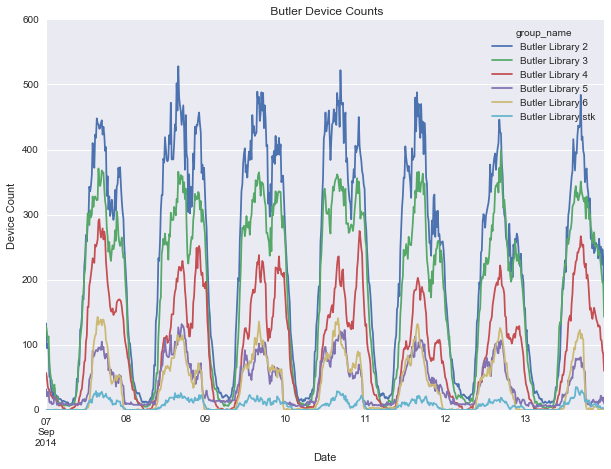

In [9]:
building_plot("Butler", start="20140907", end="20140913")

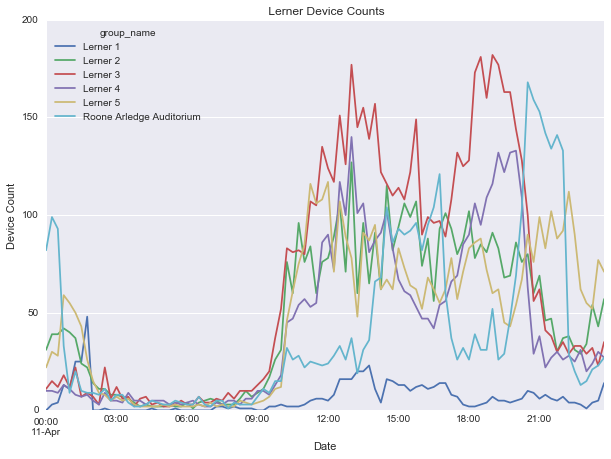

In [10]:
building_plot("Lerner", start="20150411", end="20150411")

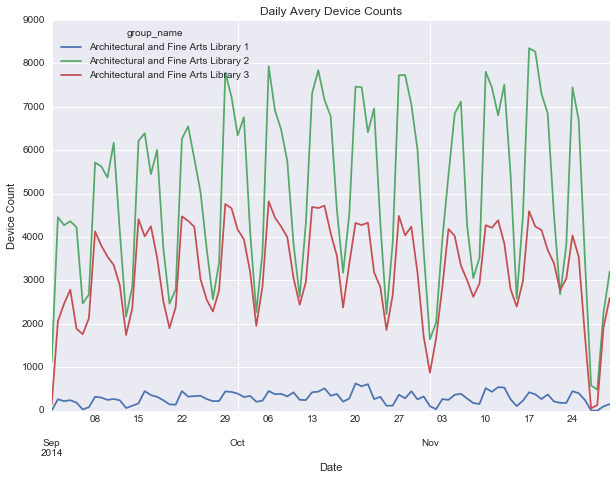

In [11]:
building_plot("Avery", group="D", start="20140901", end="20141130")

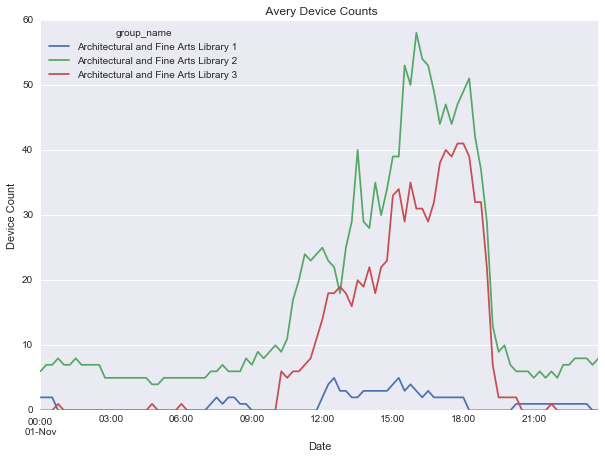

In [12]:
building_plot("Avery", start="20141101", end="20141101")